In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/data_open_weather_map.csv')

In [29]:
df1 = data.copy()


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379968 entries, 0 to 379967
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   elevation                  379968 non-null  int64  
 1   timestamp                  379968 non-null  object 
 2   textDescription            379968 non-null  object 
 3   temperature                379968 non-null  float64
 4   dewPoint                   379967 non-null  float64
 5   windDirection              379968 non-null  int64  
 6   windSpeed                  379968 non-null  float64
 7   windGust                   54718 non-null   float64
 8   barometricPressure         379968 non-null  int64  
 9   seaLevelPressure           0 non-null       float64
 10  visibility                 343494 non-null  float64
 11  maxTemperatureLast24Hours  0 non-null       float64
 12  minTemperatureLast24Hours  0 non-null       float64
 13  precipitationLastHour      45

In [31]:
df1.isnull().sum()

elevation                         0
timestamp                         0
textDescription                   0
temperature                       0
dewPoint                          1
windDirection                     0
windSpeed                         0
windGust                     325250
barometricPressure                0
seaLevelPressure             379968
visibility                    36474
maxTemperatureLast24Hours    379968
minTemperatureLast24Hours    379968
precipitationLastHour        334029
precipitationLast3Hours      375216
precipitationLast6Hours      379968
relativeHumidity                  0
windChill                    379968
heatIndex                    379968
dtype: int64

In [32]:
df2 = df1.drop(columns=['visibility','timestamp','windGust', 'maxTemperatureLast24Hours', 'minTemperatureLast24Hours', 'precipitationLastHour', 'precipitationLast3Hours', 'precipitationLast6Hours', 'windChill', 'heatIndex', 'seaLevelPressure'], inplace=True)


In [33]:
df2 = df1.copy()
df2.head()

,elevation,textDescription,temperature,dewPoint,windDirection,windSpeed,barometricPressure,relativeHumidity
0,27,Fog/Mist,6.32,5.12,170,6.7,1031,92
1,27,Light Precipitation,6.22,5.02,170,6.7,1031,92
2,27,Light Precipitation,6.28,5.08,170,6.7,1029,92
3,27,Light Precipitation,7.53,6.32,190,5.2,1029,92
4,27,Light Precipitation,7.38,6.17,190,5.2,1029,92


In [34]:
df2.isnull().sum()

elevation             0
textDescription       0
temperature           0
dewPoint              1
windDirection         0
windSpeed             0
barometricPressure    0
relativeHumidity      0
dtype: int64

In [35]:
df2.shape

(379968, 8)

## Data Cleaning 

In [36]:
# fillig the null value with a previous value
df2 = df2.fillna(method = 'pad')

In [37]:
df2.isnull().sum()

elevation             0
textDescription       0
temperature           0
dewPoint              0
windDirection         0
windSpeed             0
barometricPressure    0
relativeHumidity      0
dtype: int64

In [38]:
df2['textDescription'].unique()

array(['Fog/Mist', 'Light Precipitation', 'Mostly Cloudy', 'Haze',
       'Precipitation', 'Partly Cloudy', 'Clear', 'Heavy Precipitation'],
      dtype=object)

In [39]:
df3 = df2.copy()
df3.head()

,elevation,textDescription,temperature,dewPoint,windDirection,windSpeed,barometricPressure,relativeHumidity
0,27,Fog/Mist,6.32,5.12,170,6.7,1031,92
1,27,Light Precipitation,6.22,5.02,170,6.7,1031,92
2,27,Light Precipitation,6.28,5.08,170,6.7,1029,92
3,27,Light Precipitation,7.53,6.32,190,5.2,1029,92
4,27,Light Precipitation,7.38,6.17,190,5.2,1029,92


In [41]:
df3.textDescription.value_counts()

Clear                  125677
Partly Cloudy           95208
Mostly Cloudy           58703
Fog/Mist                38248
Light Precipitation     34537
Haze                    17434
Precipitation            8437
Heavy Precipitation      1724
Name: textDescription, dtype: int64

In [40]:
weather_assign = {"Clear":1, 
                "Partly Cloudy":2, 
                "Mostly Cloudy":3,
                "Fog/Mist":4,
                "Haze":5,
                "Light Precipitation":6,
                "Precipitation":7,
                "Heavy Precipitation":8
                }
df3["weather_scale"] = df3["textDescription"].replace(weather_assign)

df3.head()

,elevation,textDescription,temperature,dewPoint,windDirection,windSpeed,barometricPressure,relativeHumidity,weather_scale
0,27,Fog/Mist,6.32,5.12,170,6.7,1031,92,4
1,27,Light Precipitation,6.22,5.02,170,6.7,1031,92,6
2,27,Light Precipitation,6.28,5.08,170,6.7,1029,92,6
3,27,Light Precipitation,7.53,6.32,190,5.2,1029,92,6
4,27,Light Precipitation,7.38,6.17,190,5.2,1029,92,6


In [42]:
df3.shape

(379968, 9)

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379968 entries, 0 to 379967
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   elevation           379968 non-null  int64  
 1   textDescription     379968 non-null  object 
 2   temperature         379968 non-null  float64
 3   dewPoint            379968 non-null  float64
 4   windDirection       379968 non-null  int64  
 5   windSpeed           379968 non-null  float64
 6   barometricPressure  379968 non-null  int64  
 7   relativeHumidity    379968 non-null  int64  
 8   weather_scale       379968 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 26.1+ MB


In [45]:
df4 = df3.copy()
df4.head()

,elevation,textDescription,temperature,dewPoint,windDirection,windSpeed,barometricPressure,relativeHumidity,weather_scale
0,27,Fog/Mist,6.32,5.12,170,6.7,1031,92,4
1,27,Light Precipitation,6.22,5.02,170,6.7,1031,92,6
2,27,Light Precipitation,6.28,5.08,170,6.7,1029,92,6
3,27,Light Precipitation,7.53,6.32,190,5.2,1029,92,6
4,27,Light Precipitation,7.38,6.17,190,5.2,1029,92,6


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Heatmap')

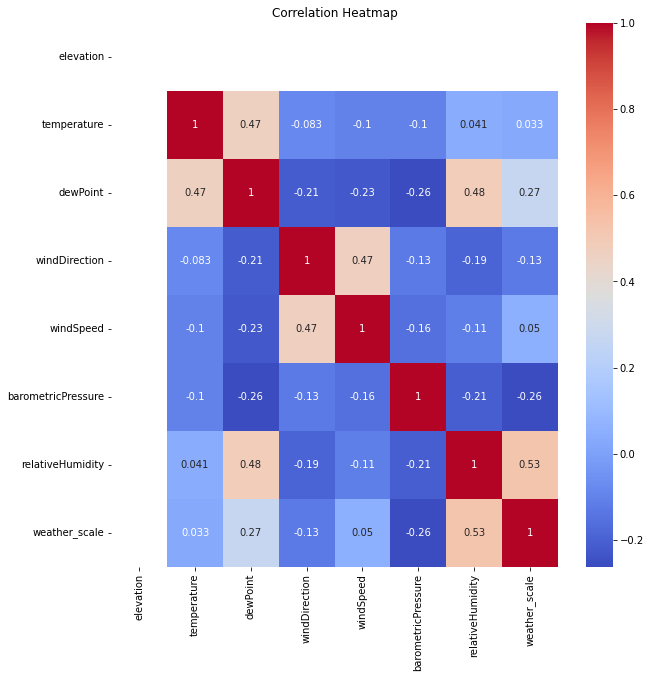

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')


## Selecting Features 

In [62]:
corr = df4.corr()
all_corr = corr.weather_scale
all_corr

elevation                  NaN
temperature           0.032958
dewPoint              0.268651
windDirection        -0.126223
windSpeed             0.049796
barometricPressure   -0.262152
relativeHumidity      0.525717
weather_scale         1.000000
Name: weather_scale, dtype: float64

### Selected medium and highly correlated features: 
* Visibility, 
* relativeHumidity, 
* dewpoint

In [160]:
df = df5.filter(['relativeHumidity','dewpoint', 'visibility', 'weather_scale'], axis=1)
df.head()

,relativeHumidity,dewpoint,visibility,weather_scale
0,54.110084,1.7,16090,1.0
1,96.074595,10.0,9660,9.0
2,92.842633,8.3,6440,11.0
3,38.862553,1.1,16090,1.0
4,12.164783,-10.6,16090,1.0


In [163]:
#create inputs and output dataframe split
X = df.drop(['weather_scale'], axis=1)
y = df['weather_scale'] 


In [164]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)


## Cleaning 

In [117]:
x_train_df = pd.read_csv("../data/x_train.csv")
y_train_df = pd.read_csv("../data/y_train.csv")
x_test_df = pd.read_csv("../data/x_test.csv")
y_test_df = pd.read_csv("../data/y_test.csv")

In [79]:
x_train_df.isnull().sum()

temperature              65
dewPoint                 67
windDirection           144
windSpeed                96
barometricPressure       64
visibility            25506
relativeHumidity         67
elevation                 0
dtype: int64

In [88]:
X_train = x_train_df.fillna(method="pad")
X_train.isnull().sum()

temperature           0
dewPoint              0
windDirection         0
windSpeed             0
barometricPressure    0
visibility            0
relativeHumidity      0
elevation             0
dtype: int64

In [89]:
y_train_df.head()

,textDescription
0,Mostly Cloudy
1,Partly Cloudy
2,Partly Cloudy
3,Partly Cloudy
4,Clear


In [93]:
y_train = y_train_df.fillna(method="pad")
y_train.isnull().sum()

textDescription    0
dtype: int64

In [110]:
y_train.value_counts()

textDescription    
Clear                  88184
Partly Cloudy          66877
Mostly Cloudy          41268
Fog/Mist               26768
Light Precipitation    24244
Haze                   12230
Precipitation           5898
Heavy Precipitation     1206
dtype: int64

In [111]:
weather_assign = {"Clear":1, 
                "Partly Cloudy":2, 
                "Mostly Cloudy":3,
                "Fog/Mist":4,
                "Haze":5,
                "Light Precipitation":6,
                "Precipitation":7,
                "Heavy Precipitation":8
                }
y_train["weather_scale"] = y_train["textDescription"].replace(weather_assign)

y_train.head()

,textDescription,weather_scale
0,Mostly Cloudy,3
1,Partly Cloudy,2
2,Partly Cloudy,2
3,Partly Cloudy,2
4,Clear,1


In [112]:
y_train.drop(columns=["textDescription"], inplace=True)

In [114]:
y_train.head()

,weather_scale
0,3
1,2
2,2
3,2
4,1


In [98]:
#x_test_df.drop(columns=["seaLevelPressure"], inplace=True)
X_test = x_test_df.head()

In [101]:
X_test = X_test.fillna(method="pad")
X_test.head()

,temperature,dewPoint,windDirection,windSpeed,barometricPressure,visibility,relativeHumidity,elevation
0,9.18,1.59,0.0,0.00,1028.0,10000.0,59.0,27
1,16.92,11.63,0.0,3.09,1012.0,10000.0,71.0,27
2,-9.33,-13.00,341.0,6.57,1035.0,10000.0,72.0,27
3,21.44,6.55,0.0,0.00,1017.0,10000.0,38.0,27
4,2.01,-6.73,270.0,12.40,1005.0,10000.0,49.0,27


In [120]:
y_test = y_test_df
y_test.head()

,textDescription
0,Clear
1,Light Precipitation
2,Clear
3,Clear
4,Clear


In [121]:
weather_assign = {"Clear":1, 
                "Partly Cloudy":2, 
                "Mostly Cloudy":3,
                "Fog/Mist":4,
                "Haze":5,
                "Light Precipitation":6,
                "Precipitation":7,
                "Heavy Precipitation":8
                }
y_test["weather_scale"] = y_test["textDescription"].replace(weather_assign)

y_test.head()

,textDescription,weather_scale
0,Clear,1.0
1,Light Precipitation,6.0
2,Clear,1.0
3,Clear,1.0
4,Clear,1.0


In [122]:
y_test.drop(columns=["textDescription"], inplace=True)

In [123]:
y_test.head()

,weather_scale
0,1.0
1,6.0
2,1.0
3,1.0
4,1.0


### Target variable to pridict:
* weather_scale 


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [125]:
# create model
model = LinearRegression()

# Fit training data to model 
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

print(y_pred)

[[2.10328403]
 [2.96818407]
 [2.73406738]
 [1.3345303 ]
 [2.57109635]]


### Measuring performance

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae= mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'MSE: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'r2: {r2}')

ValueError: Found input variables with inconsistent numbers of samples: [114290, 5]